In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("dataset/autos.csv")

In [3]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
print("Dataset")
df.shape

Dataset


(371528, 21)

In [5]:
print("Dataset")
df.dtypes

Dataset


index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [6]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
missing_values

Missing Values per Column:


index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
# Count of unique values in offerType
df.groupby('offerType').count()

,index,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
offerType,,,,,,,,,,,,,,,,,,,,
Angebot,371516,371516,371516,371516,371516,371516,333654,371516,351313,371516,351035,371516,371516,338137,371516,299462,371516,371516,371516,371516
Gesuch,12,12,12,12,12,12,5,12,6,12,9,12,12,5,12,6,12,12,12,12


In [9]:
# Count of unique values in seller
df.groupby('seller').count()

,index,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
seller,,,,,,,,,,,,,,,,,,,,
gewerblich,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3
privat,371525,371525,371525,371525,371525,371525,333656,371525,351316,371525,351041,371525,371525,338139,371525,299466,371525,371525,371525,371525


In [10]:
# Count of unique values in nrOfPictures
df.groupby('nrOfPictures').count()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
nrOfPictures,,,,,,,,,,,,,,,,,,,,
0,371528,371528,371528,371528,371528,371528,371528,333659,371528,351319,371528,351044,371528,371528,338142,371528,299468,371528,371528,371528


#### Irrelevant parameters
* offerType
* seller
* nrOfPictures

For each param one value dominates. Since each column has essentially one value, it is irrelevant as a param

In [11]:
# First remove the few rows affected
df = df.drop(df[(df['offerType'] == 'Gesuch') | (df['seller'] == 'gewerblich')].index, axis='index')

# Now remove the irrelevant columns
df = df.drop(['offerType', 'seller', 'nrOfPictures'], axis='columns')
df.dtypes

index                   int64
dateCrawled            object
name                   object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [12]:
df.shape

(371513, 18)

```
# Sampling of original dataset to reduce large/impractical delays 
df_half = df.sample(frac=0.5, random_state=0)
df_half.shape
```

#### Target Variable Analysis (`price`)

The dataset contains the price of the car (`price`) as the primary target variable. We can perform the following tasks as part of the EDA:

* Distribution of `price`:
    * Plot a histogram or density plot to observe the grade distribution.
    * Check for normality, skewness and outliers.
* Bin `price` into categories:
    * Create categories like "Low," "Average," and "High" performance to analyze patterns.

Text(0, 0.5, 'Frequency')

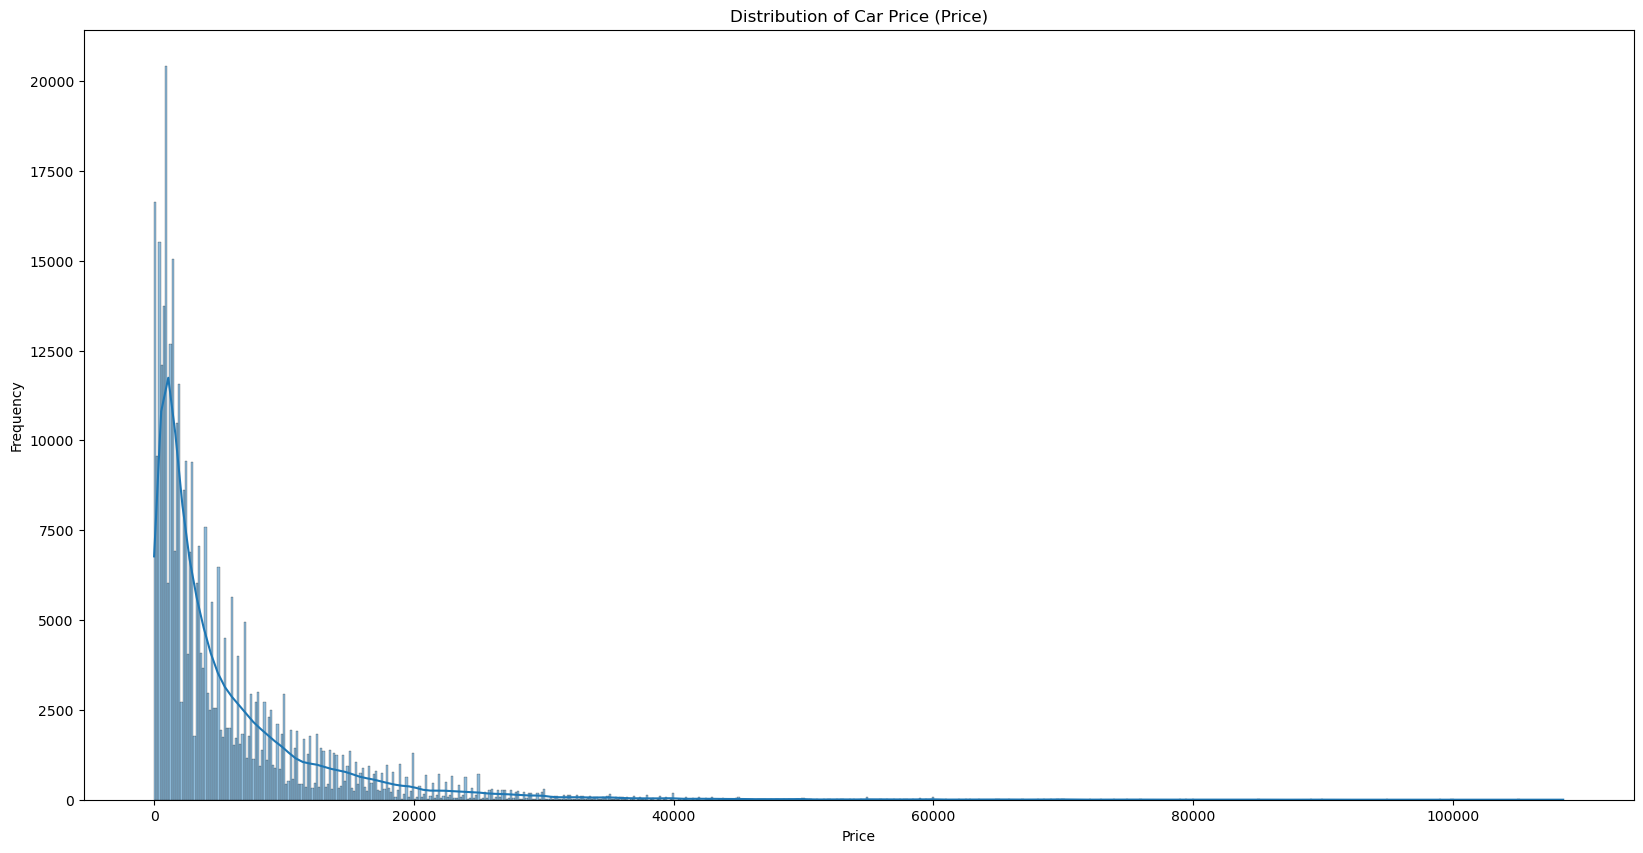

In [21]:
# distribution
# `price` has extreme values that make rendering the histogram impossible
# thus, we exclude them just for the chart
q_low, q_high = df['price'].quantile([0.001, 0.999])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_trimmed['price'], kde=True)
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

<Axes: ylabel='price'>

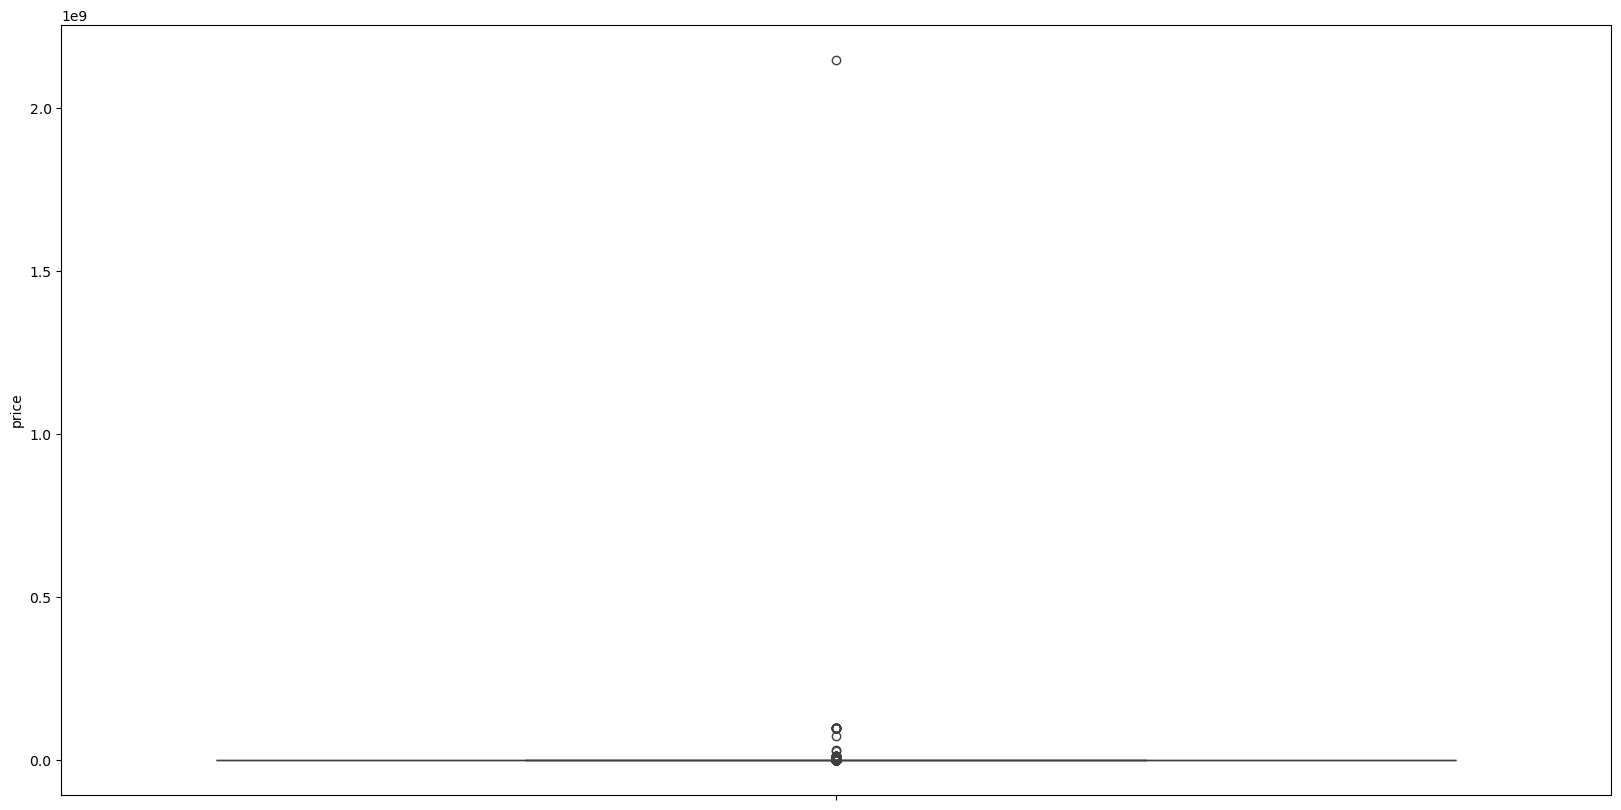

In [27]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, y='price')

<Axes: ylabel='price'>

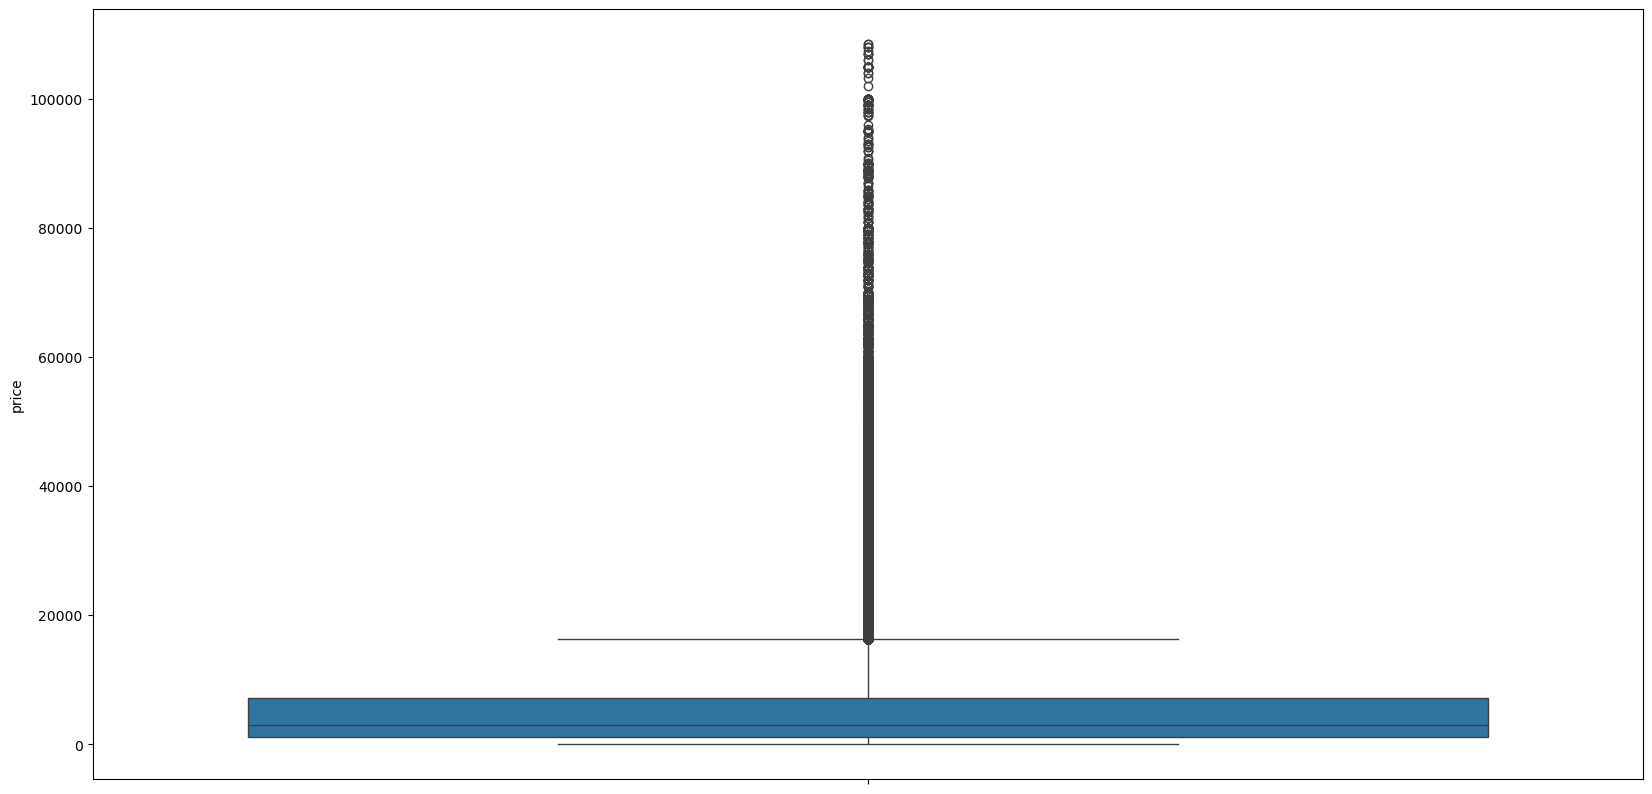

In [28]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

<Axes: ylabel='price'>

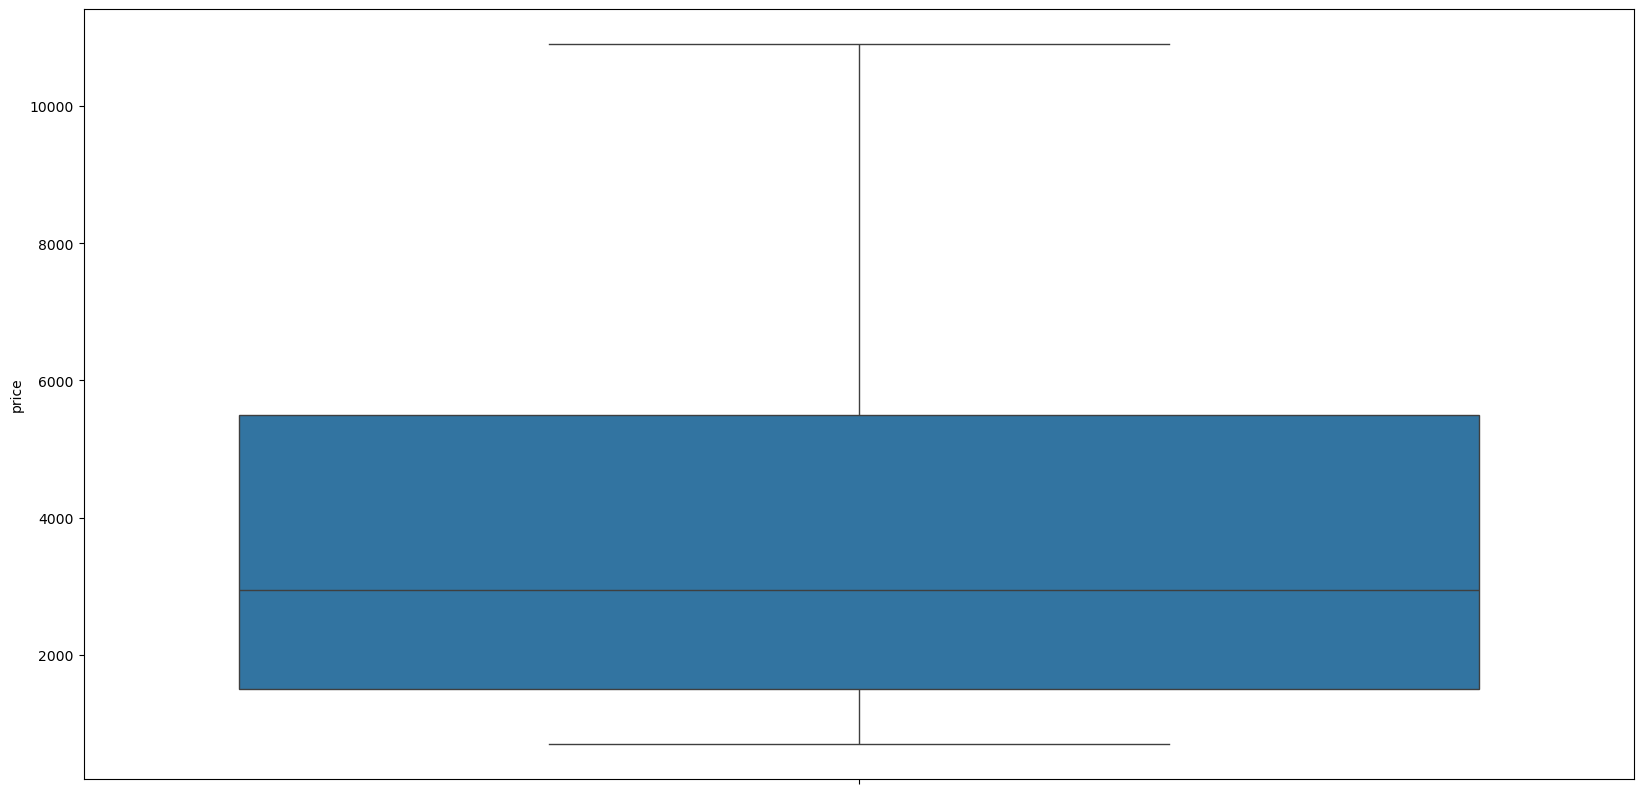

In [32]:
q_low, q_high = df['price'].quantile([0.15, 0.85])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')